In [138]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline
df = pd.read_csv('production-data.csv')
df['produced'] = df['produced'].astype(int)
hr = 'harpy.co'
wst = 'westeros.inc'

def boxplot_def_m(n,supplier):
    new_df = pd.DataFrame([])
    prod_month = n
    for month in range(n+1, 8):
        new_df[str(month)+'m'] = df[np.logical_and(np.logical_and(df['supplier'].values==supplier, \
                                                                  df['production.date'].values==prod_month), \
                                                   df['report.date'].values==month)]['defects'].values
    sns.boxplot(new_df)
    plt.title(supplier)
    
def boxplot_cmp(n):
    plt.subplot(121)
    boxplot_def_m(n,wst)
    plt.subplot(122)
    boxplot_def_m(n,hr)

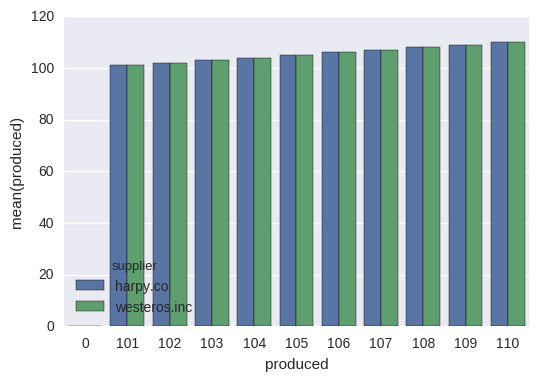

In [139]:
sns.barplot(x="produced", y="produced", hue="supplier", data=df)
plt.savefig('hw.png')

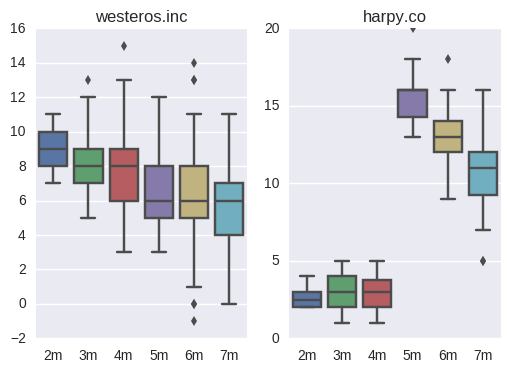

In [132]:
boxplot_cmp(1)

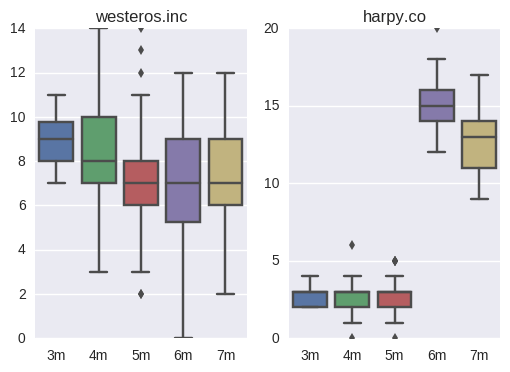

In [141]:
boxplot_cmp(2)

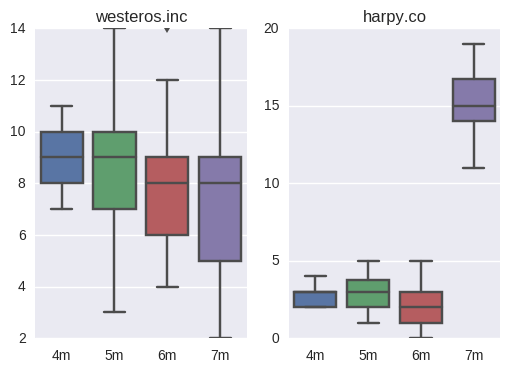

In [135]:
boxplot_cmp(3)

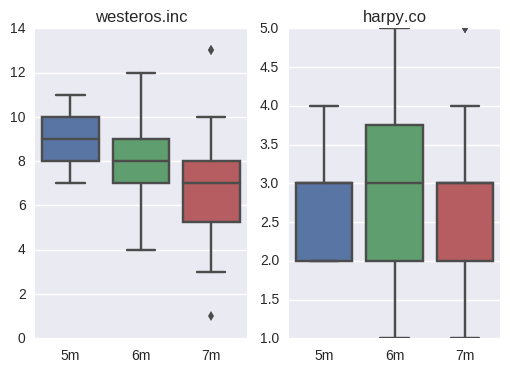

In [136]:
boxplot_cmp(4)

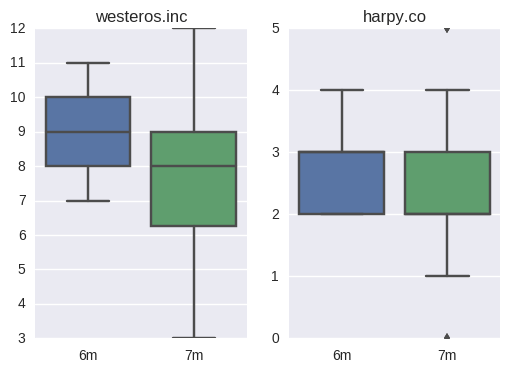

In [142]:
boxplot_cmp(5)

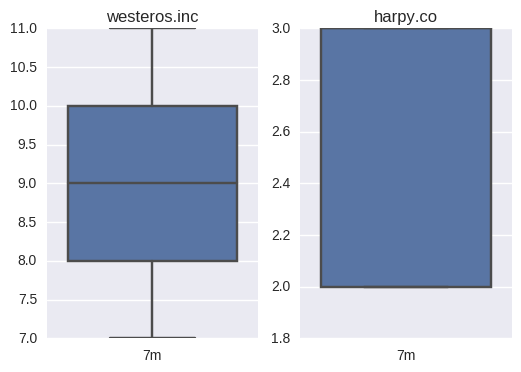

In [137]:
boxplot_cmp(6)

In [149]:
def boxplot_def(supplier):
    df['term'] = [0]*len(df)
    for term in range(1, 7):
        df.loc[df['report.date']-df['production.date']==term, 'term'] = term
    sns.boxplot(x='term', y='defects', \
            data=df[np.logical_and(df['term']!=0, df['supplier']==supplier)])
    plt.title(supplier)

def plot_combination():
    plt.subplot(121)
    boxplot_def(wst)
    plt.subplot(122)
    boxplot_def(hr)

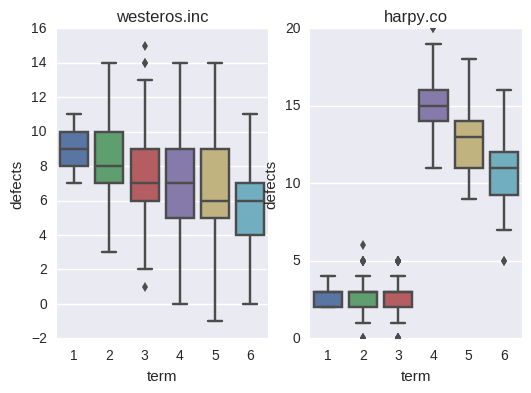

In [150]:
plot_combination()